In [1]:
import numpy as np
import pandas as pd

In [2]:
albums = pd.read_csv('data/spotify-2023.csv', encoding = "ISO-8859-1")
streams = albums['streams']
artist = albums['artist(s)_name']
danceability = albums['danceability_%']
month = albums['released_month']
albums

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [3]:
albums = albums.to_numpy()
albums

# not sure how to get around this,
# when i convert the dataframe to numpy, 
# i can't retain the column indices.

array([['Seven (feat. Latto) (Explicit Ver.)', 'Latto, Jung Kook', 2,
        ..., 0, 8, 4],
       ['LALA', 'Myke Towers', 1, ..., 0, 10, 4],
       ['vampire', 'Olivia Rodrigo', 1, ..., 0, 31, 6],
       ...,
       ['A Veces (feat. Feid)', 'Feid, Paulo Londra', 2, ..., 0, 8, 6],
       ['En La De Ella', 'Feid, Sech, Jhayco', 3, ..., 0, 12, 5],
       ['Alone', 'Burna Boy', 1, ..., 0, 11, 5]], dtype=object)

In [4]:
albums[albums[:,7]==0] = np.nan

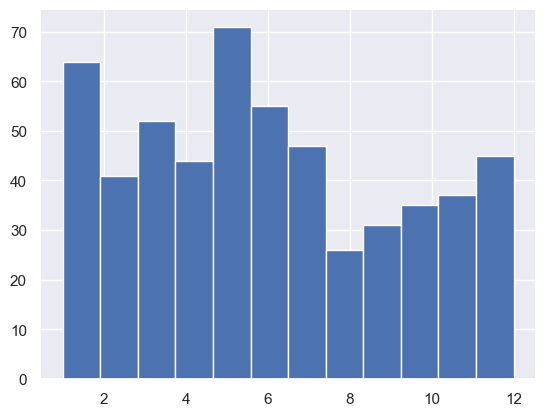

In [5]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
plt.hist(albums[:,4], 12); # plotting top 50 music releases on a 12 month chart

# lets say i want to release a new song
# do i want to release when activity is low or high?
# lets sample the highest and lowest activity month to see how those artists did


In [6]:
albums = np.array(albums)
albums[albums[:,7]==0] = np.nan

In [7]:
august_releases = albums[month == 8]
january_releases = albums[month == 1]
all_releases = albums[month >= 0]
january_charts = january_releases[:,7]
august_charts = august_releases[:,7]
all_charts = all_releases[:,7]

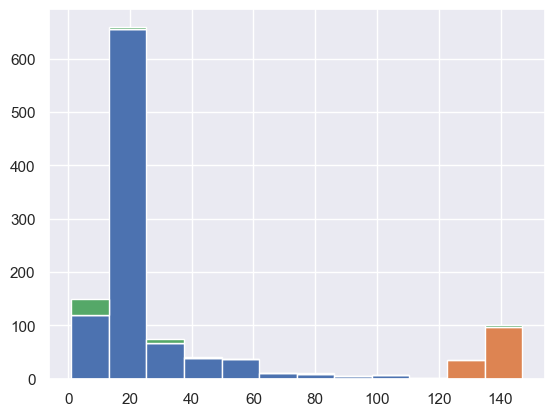

In [8]:
plt.hist([all_charts, january_charts, august_charts], 12, histtype='bar', stacked=True); #in green

# below: x axis is place on the spotify chart (lower is obvs better)
# below: y axis is number of songs

# trying not to get too in the weeds on matplotlib since that's for later!


(array([38.,  3.,  2.,  5.,  4.,  0.,  4.,  2.,  3.,  3.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

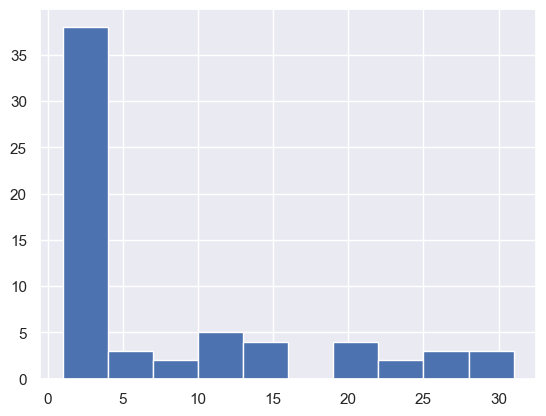

In [9]:
# so january has the highest activity for popular releases,
# and january releases perform better on the charts than august, too

plt.hist(january_releases[:,5])

In [16]:
# wow, so a lot of Jan1 releases...

# let's see what was released on Jan1

jan1 = january_releases[january_releases[:,5]==1]
pd.DataFrame(jan1)

# Jon, is there a way to add all my column labels when making this 
# into a data frame without having to manually specify them all?

#pd.DataFrame(data=jan1, index=jan1[:,0], columns=jan1[0,:])

# not sure why but pandas removed all my column and row info :(

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,135,NaN,Minor,48,44,42,12,2,11,3
1,Blank Space,Taylor Swift,1,2014,1,1,11434,53,1355959075,154,...,96,F,Major,75,57,68,9,0,13,6
2,Style,Taylor Swift,1,2014,1,1,7830,42,786181836,94,...,95,D,Major,60,48,79,0,0,12,4
3,Yellow,Chris Molitor,1,1999,1,1,31358,43,1755214421,196,...,173,B,Major,43,28,66,0,0,23,3
4,Viva La Vida,Coldplay,1,2008,1,1,33898,62,1592909789,233,...,138,F,Minor,49,42,62,9,0,11,3
5,Riptide,Vance Joy,1,1975,1,1,31123,55,2009094673,300,...,102,C#,Major,48,50,73,43,0,15,4
6,Summertime Sadness,Lana Del Rey,1,2011,1,1,20333,52,983637508,89,...,112,C#,Minor,56,24,66,7,0,12,3
7,Lover,Taylor Swift,1,2012,1,1,8448,23,882831184,160,...,206,G,Major,43,50,55,50,0,15,10
8,Mockingbird,Eminem,1,2004,1,1,12985,61,1241559043,49,...,84,E,Minor,62,24,67,21,0,13,28
9,Set Fire to the Rain,Adele,1,2011,1,1,14739,43,1163620694,88,...,108,D,Minor,61,47,68,0,0,13,3


In [11]:
albums2 = np.array(albums)
albums2.shape

(953, 24)

In [12]:
albums2 = np.sort(albums2[:,7])
albums2

# this isn't sorting correctly! not sure why, but i suspect the numbers
# are too big for the data type that's being used. what do you think jon?

array([5, 9, 15, nan, nan, nan, 12, nan, 2, 3, 4, 8, nan, 2, 2, nan, nan,
       2, nan, nan, nan, nan, 4, 16, nan, 28, nan, 5, nan, 4, 6, 10, 147,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, 2, 9, nan, nan, nan, nan, 2, nan, 1, 20, nan, nan, nan,
       2, 2, 3, 32, nan, 2, 2, nan, 2, nan, 11, nan, 4, nan, nan, nan,
       nan, 7, 11, nan, nan, nan, nan, 7, nan, 4, nan, 1, nan, nan, 2,
       nan, 1, nan, nan, nan, 11, nan, nan, nan, nan, nan, nan, 16, nan,
       3, nan, nan, 2, nan, nan, nan, nan, nan, nan, 6, nan, nan, nan,
       nan, nan, nan, 2, 2, nan, nan, 3, nan, nan, 1, 5, nan, nan, nan, 6,
       nan, nan, 2, 2, 2, 3, nan, nan, nan, nan, nan, 1, nan, nan, 2, 3,
       nan, nan, 3, 4, nan, nan, 4, nan, nan, 4, nan, nan, 4, 5, nan, 6,
       6, 17, nan, nan, 13, nan, nan, 19, nan, nan, nan, nan, 6, 20, nan,
       nan, 34, nan, nan, nan, nan, nan, nan, nan, nan

In [13]:
# show me the artists who have danceability of 80 or more
# and show me what it takes to make a danceable song!

print('number of super-danceable artists is:', np.sum(danceability > 80)) #number of artists
dance80 = albums[danceability>80] #full chart, only danceability>80


number of super-danceable artists is: 178


In [14]:
dance_comparison = dance80[:,17:24] # selecting all other music properties
dance_comparison = np.nanmean(dance_comparison, axis=0) # finding mean of properties along columns

dance_col = ['danceability', 'balance', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
dance_comparison = np.vstack([dance_col, dance_comparison])
pd.DataFrame(dance_comparison)

# so again, not really an expert in matplotlib or pandas yet
# but this should show accurate info for what it takes to make
# a very danceable tune! (dancability > 80)

,0,1,2,3,4,5,6
0,danceability,balance,energy,acousticness,instrumentalness,liveness,speechiness
1,85.673267,63.752475,66.287129,22.742574,0.594059,17.039604,12.643564
